# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [13]:
original_cities = ["Paris", "London", "New York City", "Chicago", "Brasilia"]
original_cities

['Paris', 'London', 'New York City', 'Chicago', 'Brasilia']

In [14]:
time.sleep(1)

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in original_cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    #print(json.dumps(response, indent=2))
    
print(f"The latitude information received is: {lat}")
print(f"The latitude information received is: {lng}")
print(f"The temperature information received is: {max_temp}")
print(f"The latitude information received is: {humidity}")
print(f"The latitude information received is: {cloudiness}")
print(f"The latitude information received is: {wind_speed}")
print(f"The latitude information received is: {country}")
print(f"The latitude information received is: {date}")

The latitude information received is: [48.85, 51.51, 40.71, 41.85, -15.78]
The latitude information received is: [2.35, -0.13, -74.01, -87.65, -47.93]
The temperature information received is: [51.8, 55.4, 62.6, 42.01, 69.8]
The latitude information received is: [76, 66, 77, 88, 94]
The latitude information received is: [83, 100, 75, 100, 75]
The latitude information received is: [9.17, 8.05, 5.82, 11.52, 6.93]
The latitude information received is: ['FR', 'GB', 'US', 'US', 'BR']
The latitude information received is: [1603150528, 1603150591, 1603150610, 1603150650, 1603150755]


## Convert Raw Data to DataFrame
* Save as csv

In [16]:
#create a df of the variables
weather_dict = {
   "City": original_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Contry": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Contry,Date
0,Paris,48.85,2.35,51.80,76,83,9.17,FR,1603150528
1,London,51.51,-0.13,55.40,66,100,8.05,GB,1603150591
2,New York City,40.71,-74.01,62.60,77,75,5.82,US,1603150610
3,Chicago,41.85,-87.65,42.01,88,100,11.52,US,1603150650
4,Brasilia,-15.78,-47.93,69.80,94,75,6.93,BR,1603150755


In [17]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

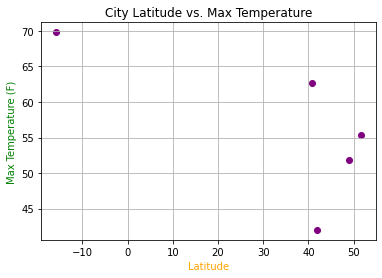

In [18]:
#lat vs temp scatter plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig('Latitude vs. Temperature Plot.png')
plt.show()

### Latitude vs. Humidity Plot

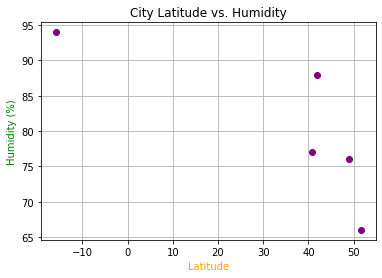

In [19]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig('Latitude vs. Humidity Plot.png')
plt.show()

### Latitude vs. Cloudiness Plot

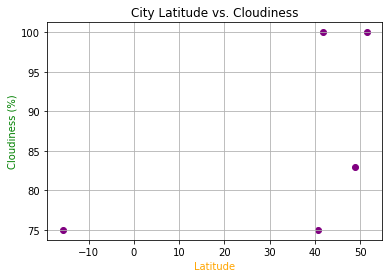

In [20]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig('Latitude vs. Cloudiness Plot.png')
plt.show()

### Latitude vs. Wind Speed Plot

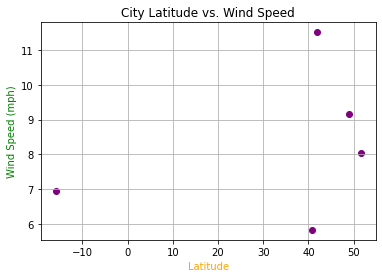

In [21]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig('Latitude vs. Wind Speed Plot.png')
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [22]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data['Lat'], weather_data['Max Temp'])

# Get regression values
regress_values = weather_data['Max Temp'] * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.27x +65.18


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.0011412081678079309


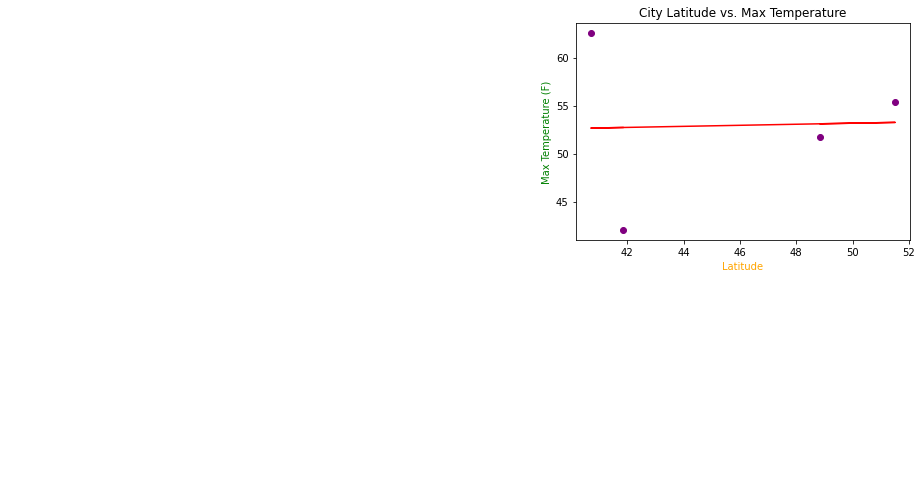

In [39]:
# Add the linear regression equation and line to plot
#x_values = weather_data['Lat']
x_values = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_values = weather_data['Max Temp'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Max Temp'].loc[weather_data['Lat'] >= 0], color = "purple")
#plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4887021892786173


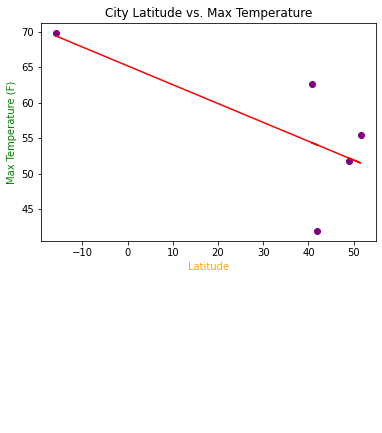

In [27]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.6140142235547477


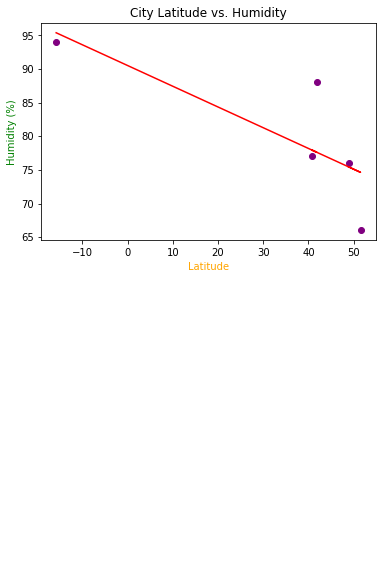

In [28]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity")
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity (%)", color = "green")
plt.title("City Latitude vs. Humidity")
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.503810012946749


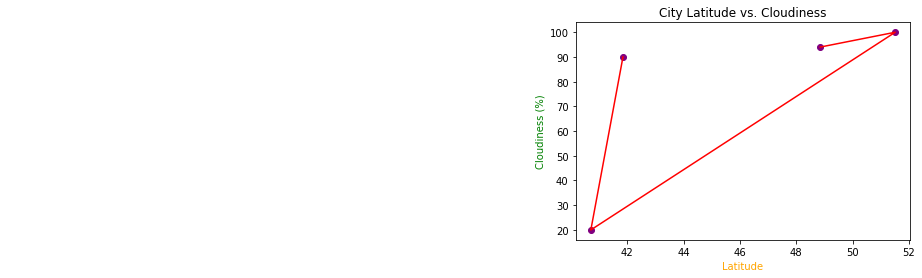

In [99]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness (%)", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.5470152692513237


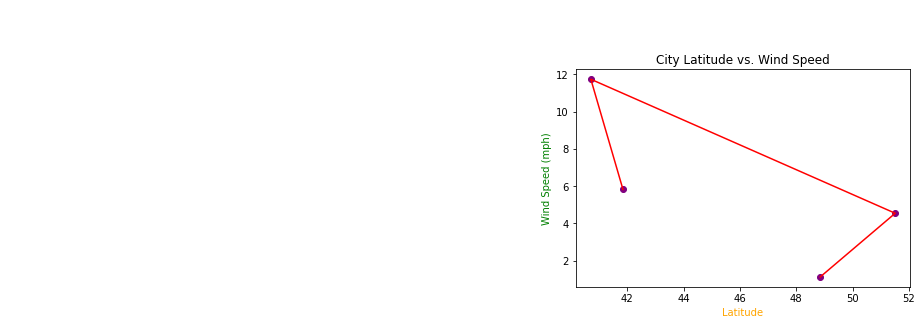

In [100]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.5470152692513237


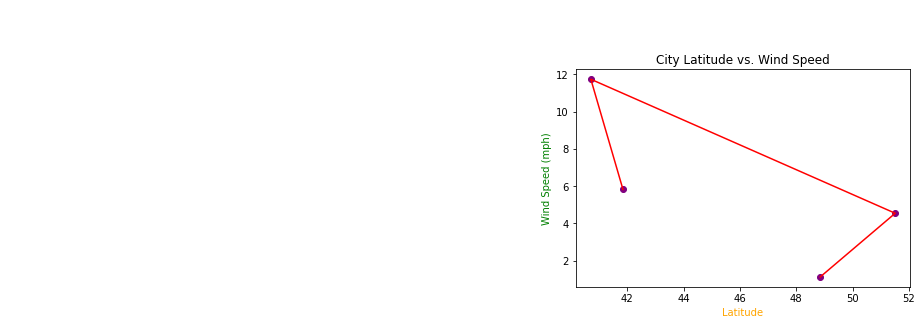

In [101]:
# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

#scatter plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], color = "purple")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed (mph)", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

# Show plot
plt.show()